# Web Scraping - Case_Oscar Speech History_ACTRESS IN A LEAD ROLE.
<p>Prepared by: <a href = 'https://github.com/sagsshakya'>Sagun Shakya</a></p>

- GITAM Institute of Science.

### Importing necessary libraries.

In [1]:
import requests
from bs4 import BeautifulSoup as BS

### Extracting all URLs from the webpage using for loop.

In [2]:
urlList = ['http://aaspeechesdb.oscars.org/results.aspx?AC=PREV_RECORD&XC=/results.aspx&BU=http%3A%2F%2Faaspeechesdb.oscars.org%2F&TN=aatrans&SN=AUTO27563&SE=131&RN='+ str(ii) +'&MR=0&TR=0&TX=1000&ES=0&CS=0&XP=&RF=WebReportList&EF=&DF=WebReportOscars&RL=0&EL=0&DL=0&NP=255&ID=&MF=oscarsmsg.ini&MQ=&TI=0&DT=&ST=0&IR=0&NR=0&NB=0&SV=0&SS=0&BG=&FG=&QS=&OEX=ISO-8859-1&OEH=utf-8' for ii in range(1,30+1)]

In [3]:
len(urlList)

30

In [4]:
yearList = [ii for ii in range(1990, 2019+1)]

### Converting the URL list into DataFrame.

In [5]:
import pandas as pd

urldf = pd.DataFrame({'URL': urlList}, index = yearList)
urldf

URL
1990  http://aaspeechesdb.oscars.org/results.aspx?AC...
1991  http://aaspeechesdb.oscars.org/results.aspx?AC...
1992  http://aaspeechesdb.oscars.org/results.aspx?AC...
1993  http://aaspeechesdb.oscars.org/results.aspx?AC...
1994  http://aaspeechesdb.oscars.org/results.aspx?AC...
1995  http://aaspeechesdb.oscars.org/results.aspx?AC...
1996  http://aaspeechesdb.oscars.org/results.aspx?AC...
1997  http://aaspeechesdb.oscars.org/results.aspx?AC...
1998  http://aaspeechesdb.oscars.org/results.aspx?AC...
1999  http://aaspeechesdb.oscars.org/results.aspx?AC...
2000  http://aaspeechesdb.oscars.org/results.aspx?AC...
2001  http://aaspeechesdb.oscars.org/results.aspx?AC...
2002  http://aaspeechesdb.oscars.org/results.aspx?AC...
2003  http://aaspeechesdb.oscars.org/results.aspx?AC...
2004  http://aaspeechesdb.oscars.org/results.aspx?AC...
2005  http://aaspeechesdb.oscars.org/results.aspx?AC...
2006  http://aaspeechesdb.oscars.org/results.aspx?AC...
2007  http://aaspeechesdb.oscars.org/results.aspx?AC...
2008  http://aaspeechesdb.oscars.org/results.aspx?AC...
2009  http://aaspeechesdb.oscars.org/results.aspx?AC...
2010  http://aaspeechesdb.oscars.org/results.aspx?AC...
2011  http://aaspeechesdb.oscars.org/results.aspx?AC...
2012  http://aaspeechesdb.oscars.org/results.aspx?AC...
2013  http://aaspeechesdb.oscars.org/results.aspx?AC...
2014  http://aaspeechesdb.oscars.org/results.aspx?AC...
2015  http://aaspeechesdb.oscars.org/results.aspx?AC...
2016  http://aaspeechesdb.oscars.org/results.aspx?AC...
2017  http://aaspeechesdb.oscars.org/results.aspx?AC...
2018  http://aaspeechesdb.oscars.org/results.aspx?AC...
2019  http://aaspeechesdb.oscars.org/results.aspx?AC...

## Scraping the required data.

In [6]:
scriptList = []
movieList = []
for ii in urldf.index.values:
    url = urldf.loc[ii][0]
    page = requests.get(url)
    soup = BS(page.text, 'html.parser')

    script = soup.find('p', class_ = 'MInormal').text
    scriptList.append(script)
    
    mov = soup.find_all('strong')
    movieList.append(mov[2].text)
    

### Winner List.

In [68]:
winnerList = [scriptList[ii].split(':')[0] for ii in range(len(scriptList))]

# Data Cleaning.
for ii in range(len(winnerList)):
    winnerList[ii] = winnerList[ii].replace(winnerList[ii][:],winnerList[ii][1:])

winnerList[:5]

['KATHY BATES',
 'JODIE FOSTER',
 'EMMA THOMPSON',
 'HOLLY HUNTER',
 'JESSICA LANGE']

### Speech List.

In [8]:
speechList = [scriptList[ii].split(':')[1] for ii in range(len(scriptList))]

# Data Cleaning.
for ii in range(len(speechList)):
    speechList[ii] = speechList[ii].replace(speechList[ii][0],'')
for ii in range(len(speechList)):
    speechList[ii] = speechList[ii].replace(speechList[ii][0],'')

speechList[:2]

['I\'d like to thank the Academy.  I\'ve been waiting a long time to say that.  I would like to congratulate all the nominees this evening, especially those in this category.  Their work continues to humble and inspire me.I would like to thank everyone associated with "Misery"',
 'This has been such an incredible year.  And I\'d like to dedicate this award to all of the women who came before me who never had the chances that I\'ve had, and the survivors and the pioneers and the outcasts; and my blood, my tradition.  And I\'d like to thank all of the people in this industry who have respected my choices and who have not been afraid of the power and the dignity that that entitled me to.And I\'d like to thank Ted Tally, and Thomas Harris, Jesse Kornbluth, everybody at Orion—the way it used to be, and the way it will always be in my heart.  John Douglas and everybody at Quantico.  The incredible cast and crew of "Silence of the Lambs" that Jonathan put together.  And of course, the reason 

### Cleaning the movieList.

In [13]:
movieList = [movieList[ii][1:] for ii in range(len(movieList))]

In [14]:
movieList

['Misery',
 'The Silence of the Lambs',
 'Howards End',
 'The Piano',
 'Blue Sky',
 'Dead Man Walking',
 'Fargo',
 'As Good as It Gets',
 'Shakespeare in Love',
 "Boys Don't Cry",
 'Erin Brockovich',
 "Monster's Ball",
 'The Hours',
 'Monster',
 'Million Dollar Baby',
 'Walk the Line',
 'The Queen',
 'La Vie en Rose',
 'The Reader',
 'The Blind Side',
 'Black Swan',
 'The Iron Lady',
 'Silver Linings Playbook',
 'Blue Jasmine',
 'Still Alice',
 'Room',
 'La La Land',
 'Three Billboards outside Ebbing, Missouri',
 'The Favourite',
 'Judy']

### Converting into DataFrame.

In [15]:
oscars = pd.DataFrame({'Winner': winnerList, 
                       'Movie': movieList,
                       'Speech': speechList, },
                      index = urldf.index.values)
oscars.head()

Winner                     Movie  \
1990    KATHY BATES                    Misery   
1991   JODIE FOSTER  The Silence of the Lambs   
1992  EMMA THOMPSON               Howards End   
1993   HOLLY HUNTER                 The Piano   
1994  JESSICA LANGE                  Blue Sky   

                                                 Speech  
1990  I'd like to thank the Academy.  I've been wait...  
1991  This has been such an incredible year.  And I'...  
1992  Ladies and gentlemen, I really don't know how ...  
1993  I'm so overwhelmed.  To be with that group of ...  
1994  I want to thank the Academy so much.  This is ...

In [16]:
oscars.shape

(30, 3)

In [17]:
df = oscars[['Speech']]
df.head()

Speech
1990  I'd like to thank the Academy.  I've been wait...
1991  This has been such an incredible year.  And I'...
1992  Ladies and gentlemen, I really don't know how ...
1993  I'm so overwhelmed.  To be with that group of ...
1994  I want to thank the Academy so much.  This is ...

### Modifying the Speech to remove punctuations, commas and ellipsis.

In [18]:
new_speech = []
for ii in range(len(df['Speech'])):
    b = df['Speech'].values[ii]
    b = b.replace('.', '')
    b = b.replace(',','')
    new_speech.append(b)
    
df['SpeechMod'] = new_speech
df.head(2)

C:\Users\Habeeb\PycharmProjects\SagunShakya\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Speech  \
1990  I'd like to thank the Academy.  I've been wait...   
1991  This has been such an incredible year.  And I'...   

                                              SpeechMod  
1990  I'd like to thank the Academy  I've been waiti...  
1991  This has been such an incredible year  And I'd...

In [20]:
from wordcloud import STOPWORDS
stopwords_list = set(STOPWORDS)

##### The list that contains all the speeches is new_speech. We carry out further filtering.

In [21]:
new_speech[0]

'I\'d like to thank the Academy  I\'ve been waiting a long time to say that  I would like to congratulate all the nominees this evening especially those in this category  Their work continues to humble and inspire meI would like to thank everyone associated with "Misery"'

### Removing Stopwords and punctuations.

In [23]:
import re
for ii in range(len(new_speech)):
    new_speech[ii] = re.sub('[^a-zA-Z]', ' ' , new_speech[ii], flags = re.IGNORECASE)
    # We can use '\W' (non - alphanumeric character or non - word character) instead of '[^a-zA-Z]'.

    #Convert into LowerCase.
    new_speech[ii] = new_speech[ii].lower()
    
    y = [ii for ii in new_speech[ii].split() if ii not in stopwords_list]
    y = ' '.join(y)
    new_speech[ii] = y

new_speech[0]

'd thank academy ve waiting long time say congratulate nominees evening especially category work continues humble inspire mei thank everyone associated misery'

### Adding the processed text to a new column in df.

In [24]:
df['SpeechProcessed'] = new_speech
df.head(2)

Speech  \
1990  I'd like to thank the Academy.  I've been wait...   
1991  This has been such an incredible year.  And I'...   

                                              SpeechMod  \
1990  I'd like to thank the Academy  I've been waiti...   
1991  This has been such an incredible year  And I'd...   

                                        SpeechProcessed  
1990  d thank academy ve waiting long time say congr...  
1991  incredible year d dedicate award women came ne...

## WordCloud.

In [25]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt         

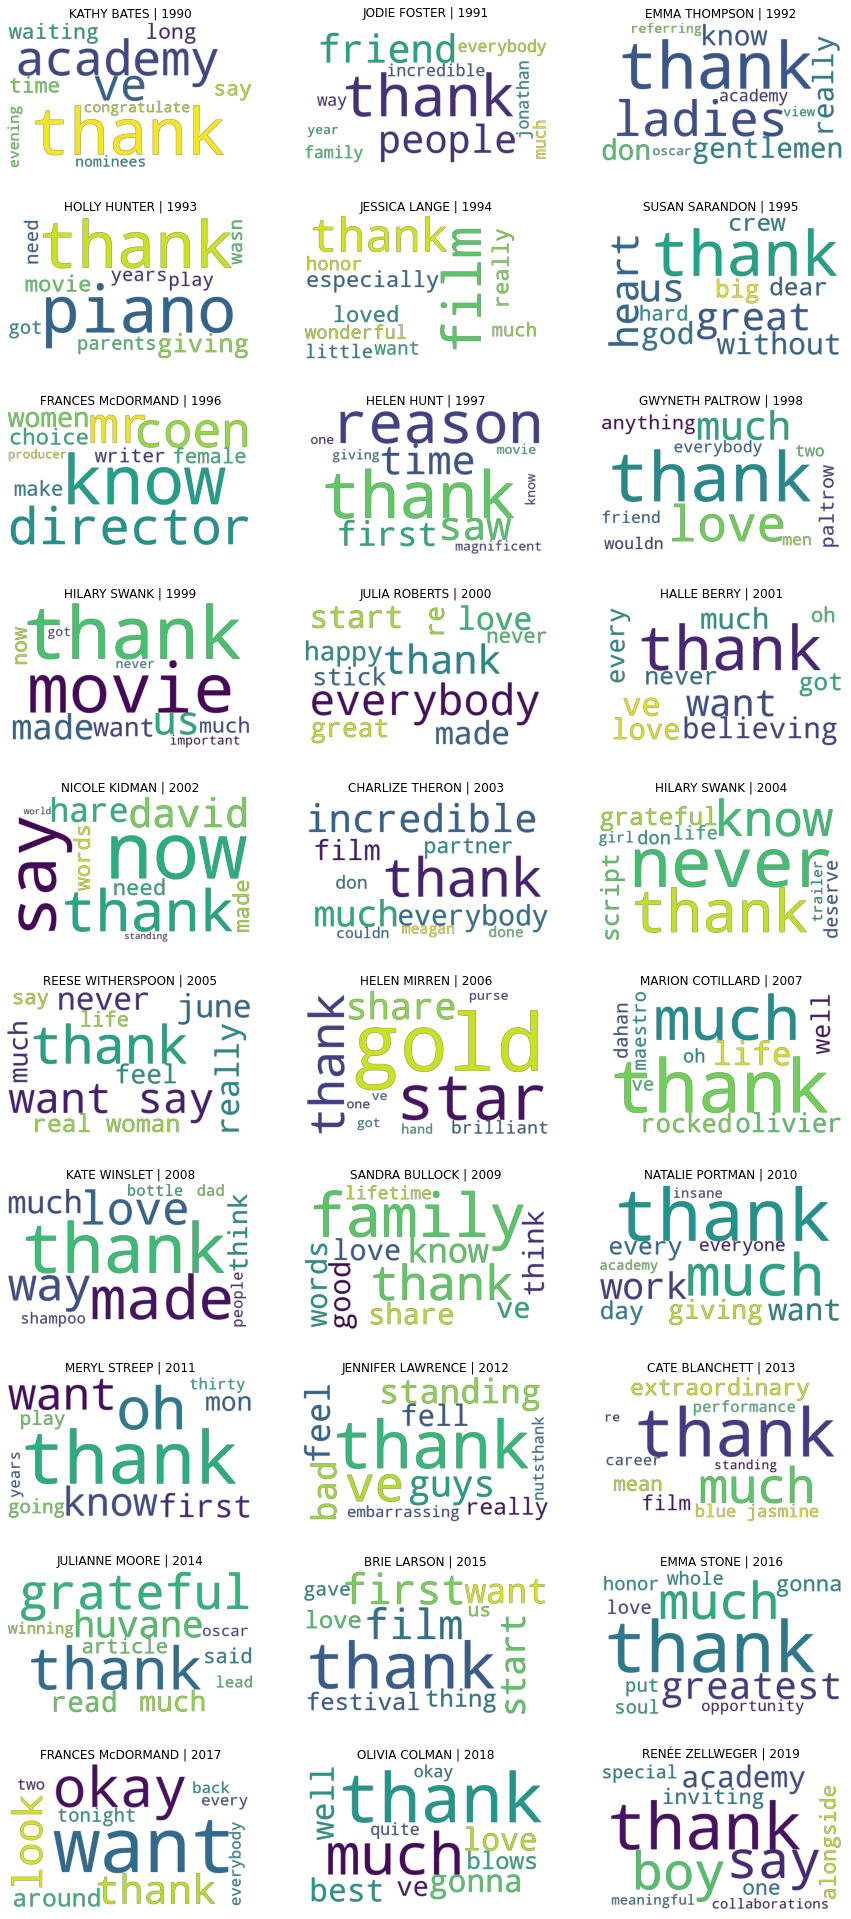

In [27]:
plt.figure(figsize = (15,35)) 

for ii in range(len(oscars['Winner'])):
    wc = WordCloud( width = 500, height = 300, max_words = 10,
                   stopwords = set(STOPWORDS), background_color = None, mode = 'RGBA',
                   contour_width = 0.5, contour_color = 'green').generate(df['SpeechProcessed'].iloc[ii])
    plt.subplot(10,3,ii+1)
    plt.imshow(wc) 
    plt.axis("off") 
    plt.title(str(oscars['Winner'].iloc[ii]) + ' | ' + str(oscars.index.values[ii]))
    #plt.tight_layout(pad = 0) 

# Exporting to a .pdf file.
import os
os.chdir(r'C:\Users\Habeeb\Documents\Sagun\Python\csv files')
plt.savefig('oscars_WordCloud_actressLead.pdf', dpi = 300, papertype = 'a4', format = 'pdf')
plt.show()

### Creating Lamda functions to calculate polarity and subjectivity.

In [28]:
pol = lambda x: round(TextBlob(x).sentiment.polarity, 2)
sub = lambda x: round(TextBlob(x).sentiment.subjectivity, 2)

#### Creating new columns in the oscars DataFrame and filling them with zeros.

In [39]:
import numpy as np
oscars['Polarity'] = np.zeros(len(oscars.Speech))
oscars['Subjectivity'] = np.zeros(len(oscars.Speech))

#### Polarity and Subjectivity of Processed Speech.

In [40]:
oscars['Polarity'] = df['SpeechProcessed'].apply(pol)
oscars['Subjectivity'] = df['SpeechProcessed'].apply(sub)
oscars.head(5)

Winner                     Movie  \
1990    KATHY BATES                    Misery   
1991   JODIE FOSTER  The Silence of the Lambs   
1992  EMMA THOMPSON               Howards End   
1993   HOLLY HUNTER                 The Piano   
1994  JESSICA LANGE                  Blue Sky   

                                                 Speech  Polarity  \
1990  I'd like to thank the Academy.  I've been wait...     -0.08   
1991  This has been such an incredible year.  And I'...      0.40   
1992  Ladies and gentlemen, I really don't know how ...      0.45   
1993  I'm so overwhelmed.  To be with that group of ...      0.18   
1994  I want to thank the Academy so much.  This is ...      0.30   

      Subjectivity  
1990          0.60  
1991          0.68  
1992          0.60  
1993          0.40  
1994          0.58

#### Polarity and Subjectivity of Partially processed Speech.

In [41]:
df['PolarityNew'] = df['SpeechMod'].apply(pol)
df['SubjectivityNew'] = df['SpeechMod'].apply(sub)
df.head(5)

Speech  \
1990  I'd like to thank the Academy.  I've been wait...   
1991  This has been such an incredible year.  And I'...   
1992  Ladies and gentlemen, I really don't know how ...   
1993  I'm so overwhelmed.  To be with that group of ...   
1994  I want to thank the Academy so much.  This is ...   

                                              SpeechMod  \
1990  I'd like to thank the Academy  I've been waiti...   
1991  This has been such an incredible year  And I'd...   
1992  Ladies and gentlemen I really don't know how t...   
1993  I'm so overwhelmed  To be with that group of a...   
1994  I want to thank the Academy so much  This is s...   

                                        SpeechProcessed  PolarityNew  \
1990  d thank academy ve waiting long time say congr...        -0.08   
1991  incredible year d dedicate award women came ne...         0.34   
1992  ladies gentlemen really don t know thank acade...         0.38   
1993  m overwhelmed group actresses slays six years ...         0.09   
1994  want thank academy much wonderful honor especi...         0.27   

      SubjectivityNew  
1990             0.60  
1991             0.67  
1992             0.65  
1993             0.38  
1994             0.55

## Visualization using graphs.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

### Cleaning the dupticate names.

In [69]:
np.where(np.array(winnerList) == 'FRANCES McDORMAND')

(array([ 6, 27], dtype=int64),)

In [70]:
winnerList[27] = winnerList[27].replace('FRANCES McDORMAND', 'FRANCES McDORMAND_2')

In [71]:
winnerList[27]

'FRANCES McDORMAND_2'

<hr>

In [72]:
np.where(np.array(winnerList) =='HILARY SWANK')

(array([ 9, 14], dtype=int64),)

In [73]:
winnerList[14] += '_2'

In [74]:
winnerList[14]

'HILARY SWANK_2'

<hr>

### Visualization using multiple plots.

#### 1. Polarity of Winners of Leading Actress category.

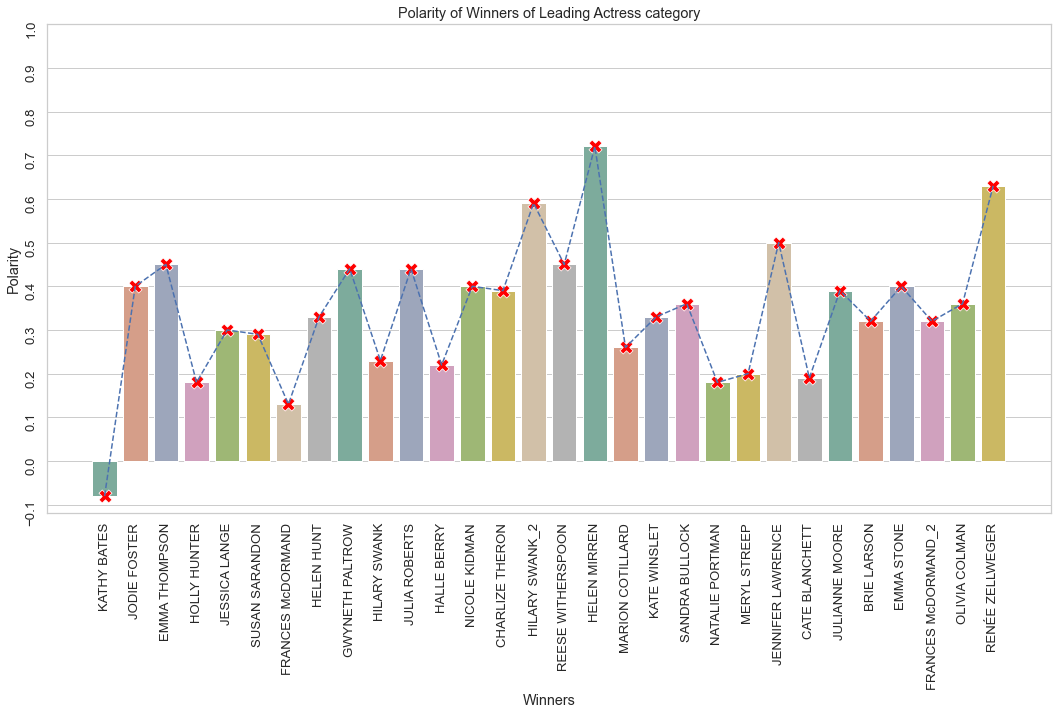

In [76]:
plt.figure(figsize = (18,9))
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.barplot(y = oscars['Polarity'], x = winnerList,
           saturation = 0.5,
           palette = 'Set2',
           dodge = True,
            errwidth = 0,
            zorder = 1)
sns.scatterplot(y = oscars['Polarity'], x = winnerList,
               marker = 'X', s = 170, color = 'red', zorder = 2)

plt.plot(winnerList, oscars['Polarity'].values, 'b--', zorder = 3)
plt.xlabel('Winners')
plt.title('Polarity of Winners of Leading Actress category')
# Use the zorder kwarg where the lower the zorder the further back the plot.
plt.yticks(np.arange(-0.1,1.01,0.1), rotation = 'vertical')
plt.xticks( rotation = 'vertical')
plt.savefig('Polarity_LeadActors.pdf', dpi = 300, papertype = 'a4', format = 'pdf')

plt.show()

#### 2. Subjectivity of Winners of Leading Actor category.

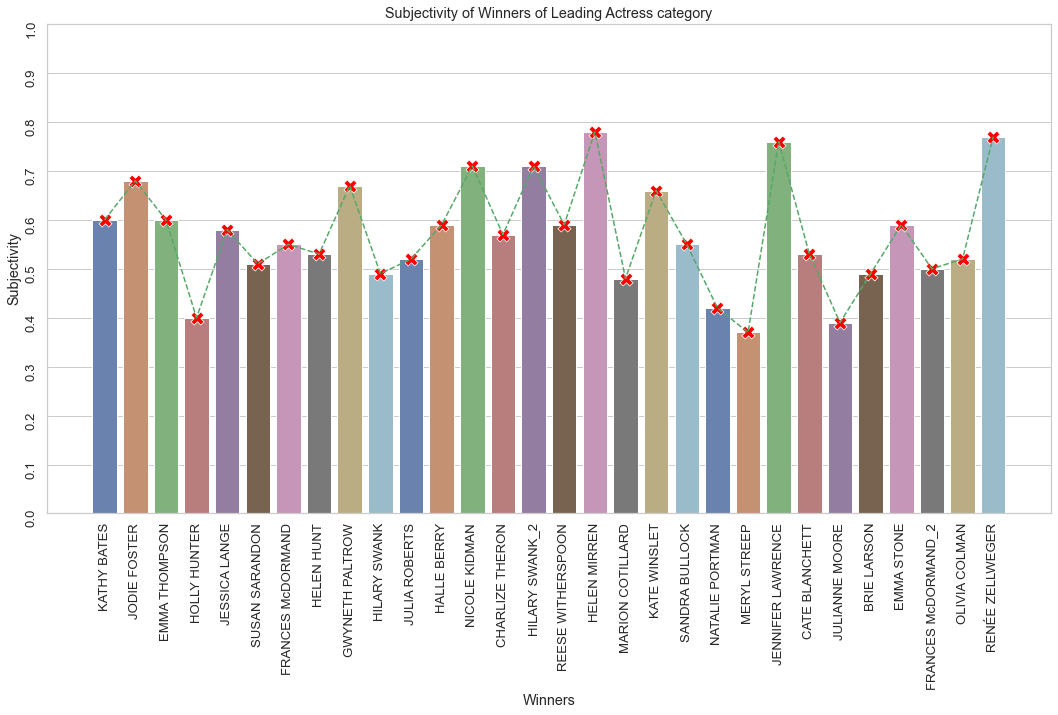

In [77]:
plt.figure(figsize = (18,9))
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.barplot(y = oscars['Subjectivity'], x = winnerList,
           saturation = 0.5,
           palette = 'muted',
           dodge = True,
            errwidth = 0,
            zorder = 1)
sns.scatterplot(y = oscars['Subjectivity'], x = winnerList,
               marker = 'X', s = 170, color = 'red', zorder = 2)

plt.plot(winnerList, oscars['Subjectivity'].values, 'g--', zorder = 3)
plt.xlabel('Winners')
plt.title('Subjectivity of Winners of Leading Actress category')
# Use the zorder kwarg where the lower the zorder the further back the plot.
plt.yticks(np.arange(0.0,1.1,0.1), rotation = 'vertical')
plt.xticks( rotation = 'vertical')

plt.show()

## Word by Word Sentiment Analysis of each Actress.

#### Tokenizing each speech into a dictionary.

In [79]:
tokenDict = dict()
for ii in range(len(yearList)):
    tokenDict[yearList[ii]] = new_speech[ii].split()
    
tokenDict[1991]

['incredible',
 'year',
 'd',
 'dedicate',
 'award',
 'women',
 'came',
 'never',
 'chances',
 've',
 'survivors',
 'pioneers',
 'outcasts',
 'blood',
 'tradition',
 'd',
 'thank',
 'people',
 'industry',
 'respected',
 'choices',
 'afraid',
 'power',
 'dignity',
 'entitled',
 'toand',
 'd',
 'thank',
 'ted',
 'tally',
 'thomas',
 'harris',
 'jesse',
 'kornbluth',
 'everybody',
 'orion',
 'way',
 'used',
 'way',
 'will',
 'always',
 'heart',
 'john',
 'douglas',
 'everybody',
 'quantico',
 'incredible',
 'cast',
 'crew',
 'silence',
 'lambs',
 'jonathan',
 'put',
 'together',
 'course',
 'reason',
 'm',
 'anthony',
 'hopkins',
 'quid',
 'pro',
 'quo',
 'doctor',
 'guru',
 'jonathan',
 'demme',
 'talent',
 'goodness',
 'promise',
 'youand',
 'd',
 'thank',
 'team',
 'people',
 'people',
 'talk',
 'every',
 'single',
 'day',
 'agent',
 'friend',
 'joe',
 'funicello',
 'thank',
 'matt',
 'saver',
 'pat',
 'kingsley',
 'd',
 'thank',
 'family',
 'family',
 'friends',
 'trusted',
 'ones',
 

#### Creating a dictionary for Polarity of each word.

In [80]:
polDict = dict()
for ii in yearList:
    polDict[ii] = [pol(tokenDict[ii][jj]) for jj in range(len(tokenDict[ii]))]
    
polDict[2005]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.4,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.36,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.2,
 0.0,
 0.9,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.75,
 0.0,
 0.33,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.8,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6,
 0.2,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

#### Creating a dictionary for Subjectivity of each word.

In [81]:
subDict = dict()
for ii in yearList:
    subDict[ii] = [sub(tokenDict[ii][jj]) for jj in range(len(tokenDict[ii]))]

### For Polarity.

In [82]:
import matplotlib.gridspec as gridspec

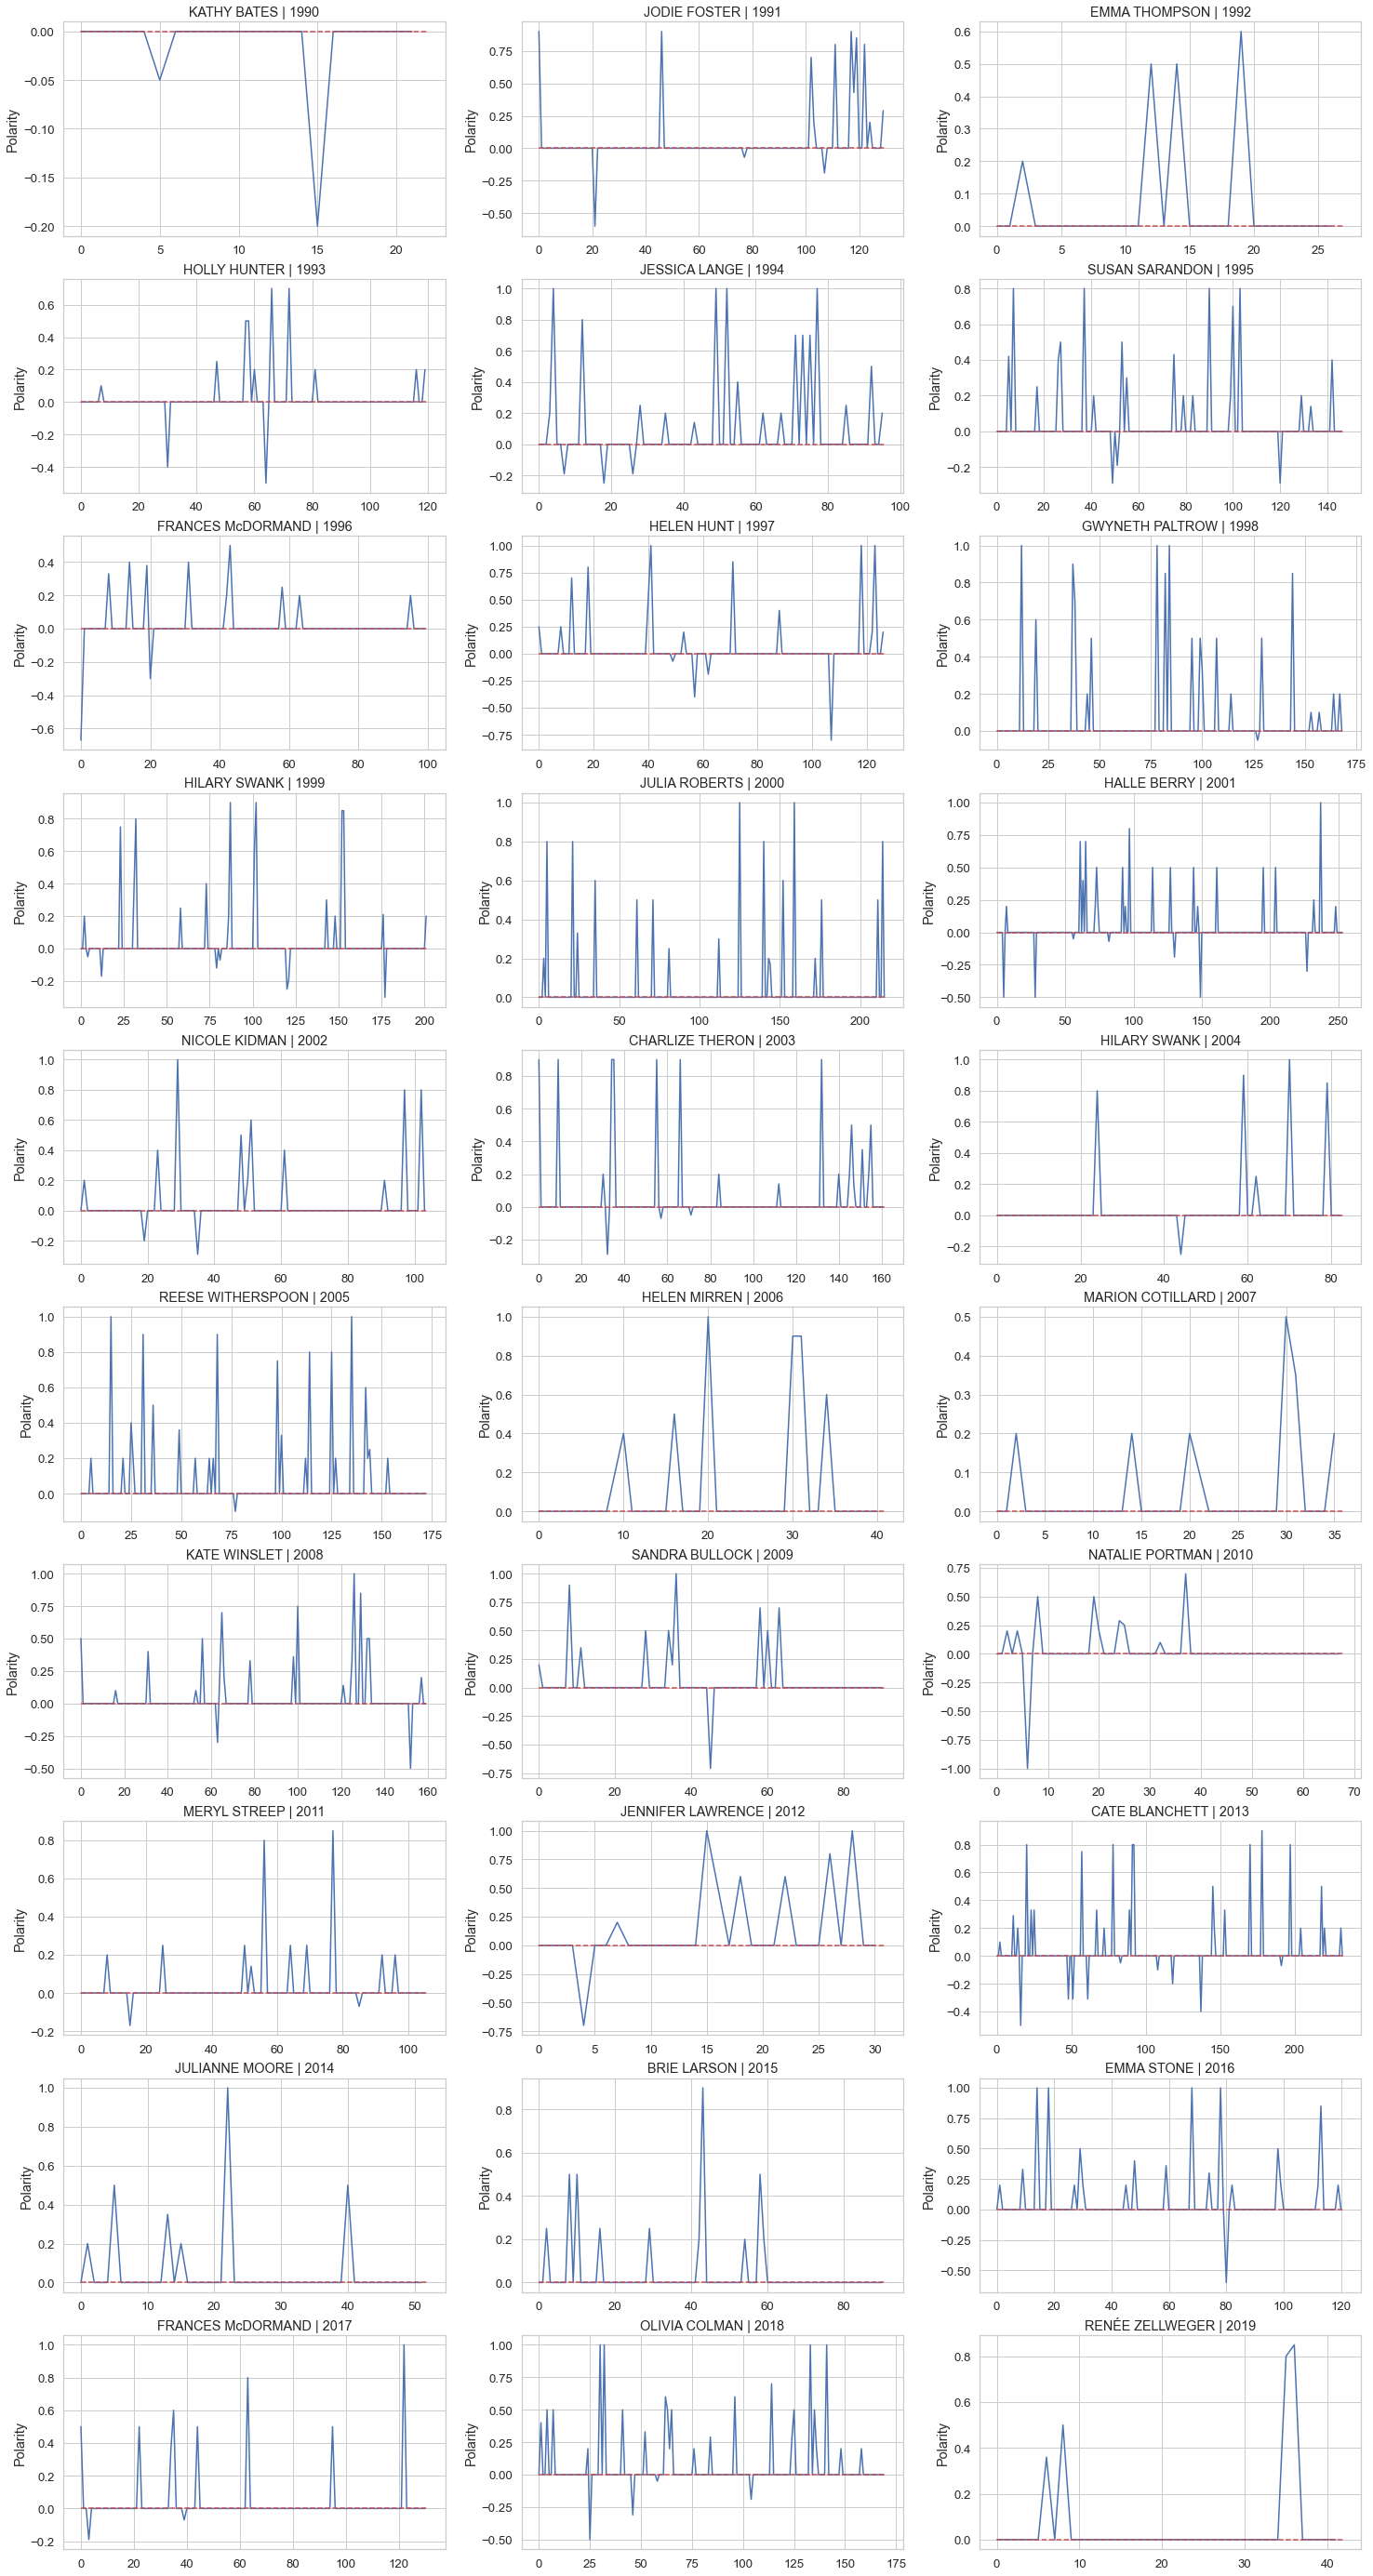

In [83]:
plt.figure(figsize = (25,50))
sns.set(style = 'whitegrid', font_scale = 1.2)

for ii in range(len(oscars['Winner'])):
    plt.subplot(10,3,ii+1)
    plt.plot(np.arange(len(polDict[oscars.index.values[ii]]) ),polDict[oscars.index.values[ii]], zorder = 1)
    
    plt.hlines(0,0,len(polDict[oscars.index.values[ii]]), 
               color = 'r', 
               linewidth = 1.5, 
               linestyle = 'dashed',
               zorder = 2)
    
    plt.ylabel('Polarity')
    plt.title(str(oscars['Winner'].iloc[ii]) + ' | ' + str(oscars.index.values[ii]))

gs = gridspec.GridSpec(10, 3)
# set the space between subplots and the position of the subplots in the figure
gs.update(wspace=0.9, hspace=0.8, left = 0.1, right = 0.3, bottom = 0.1, top = 0.9) 
plt.show()

### For Subjectivity.

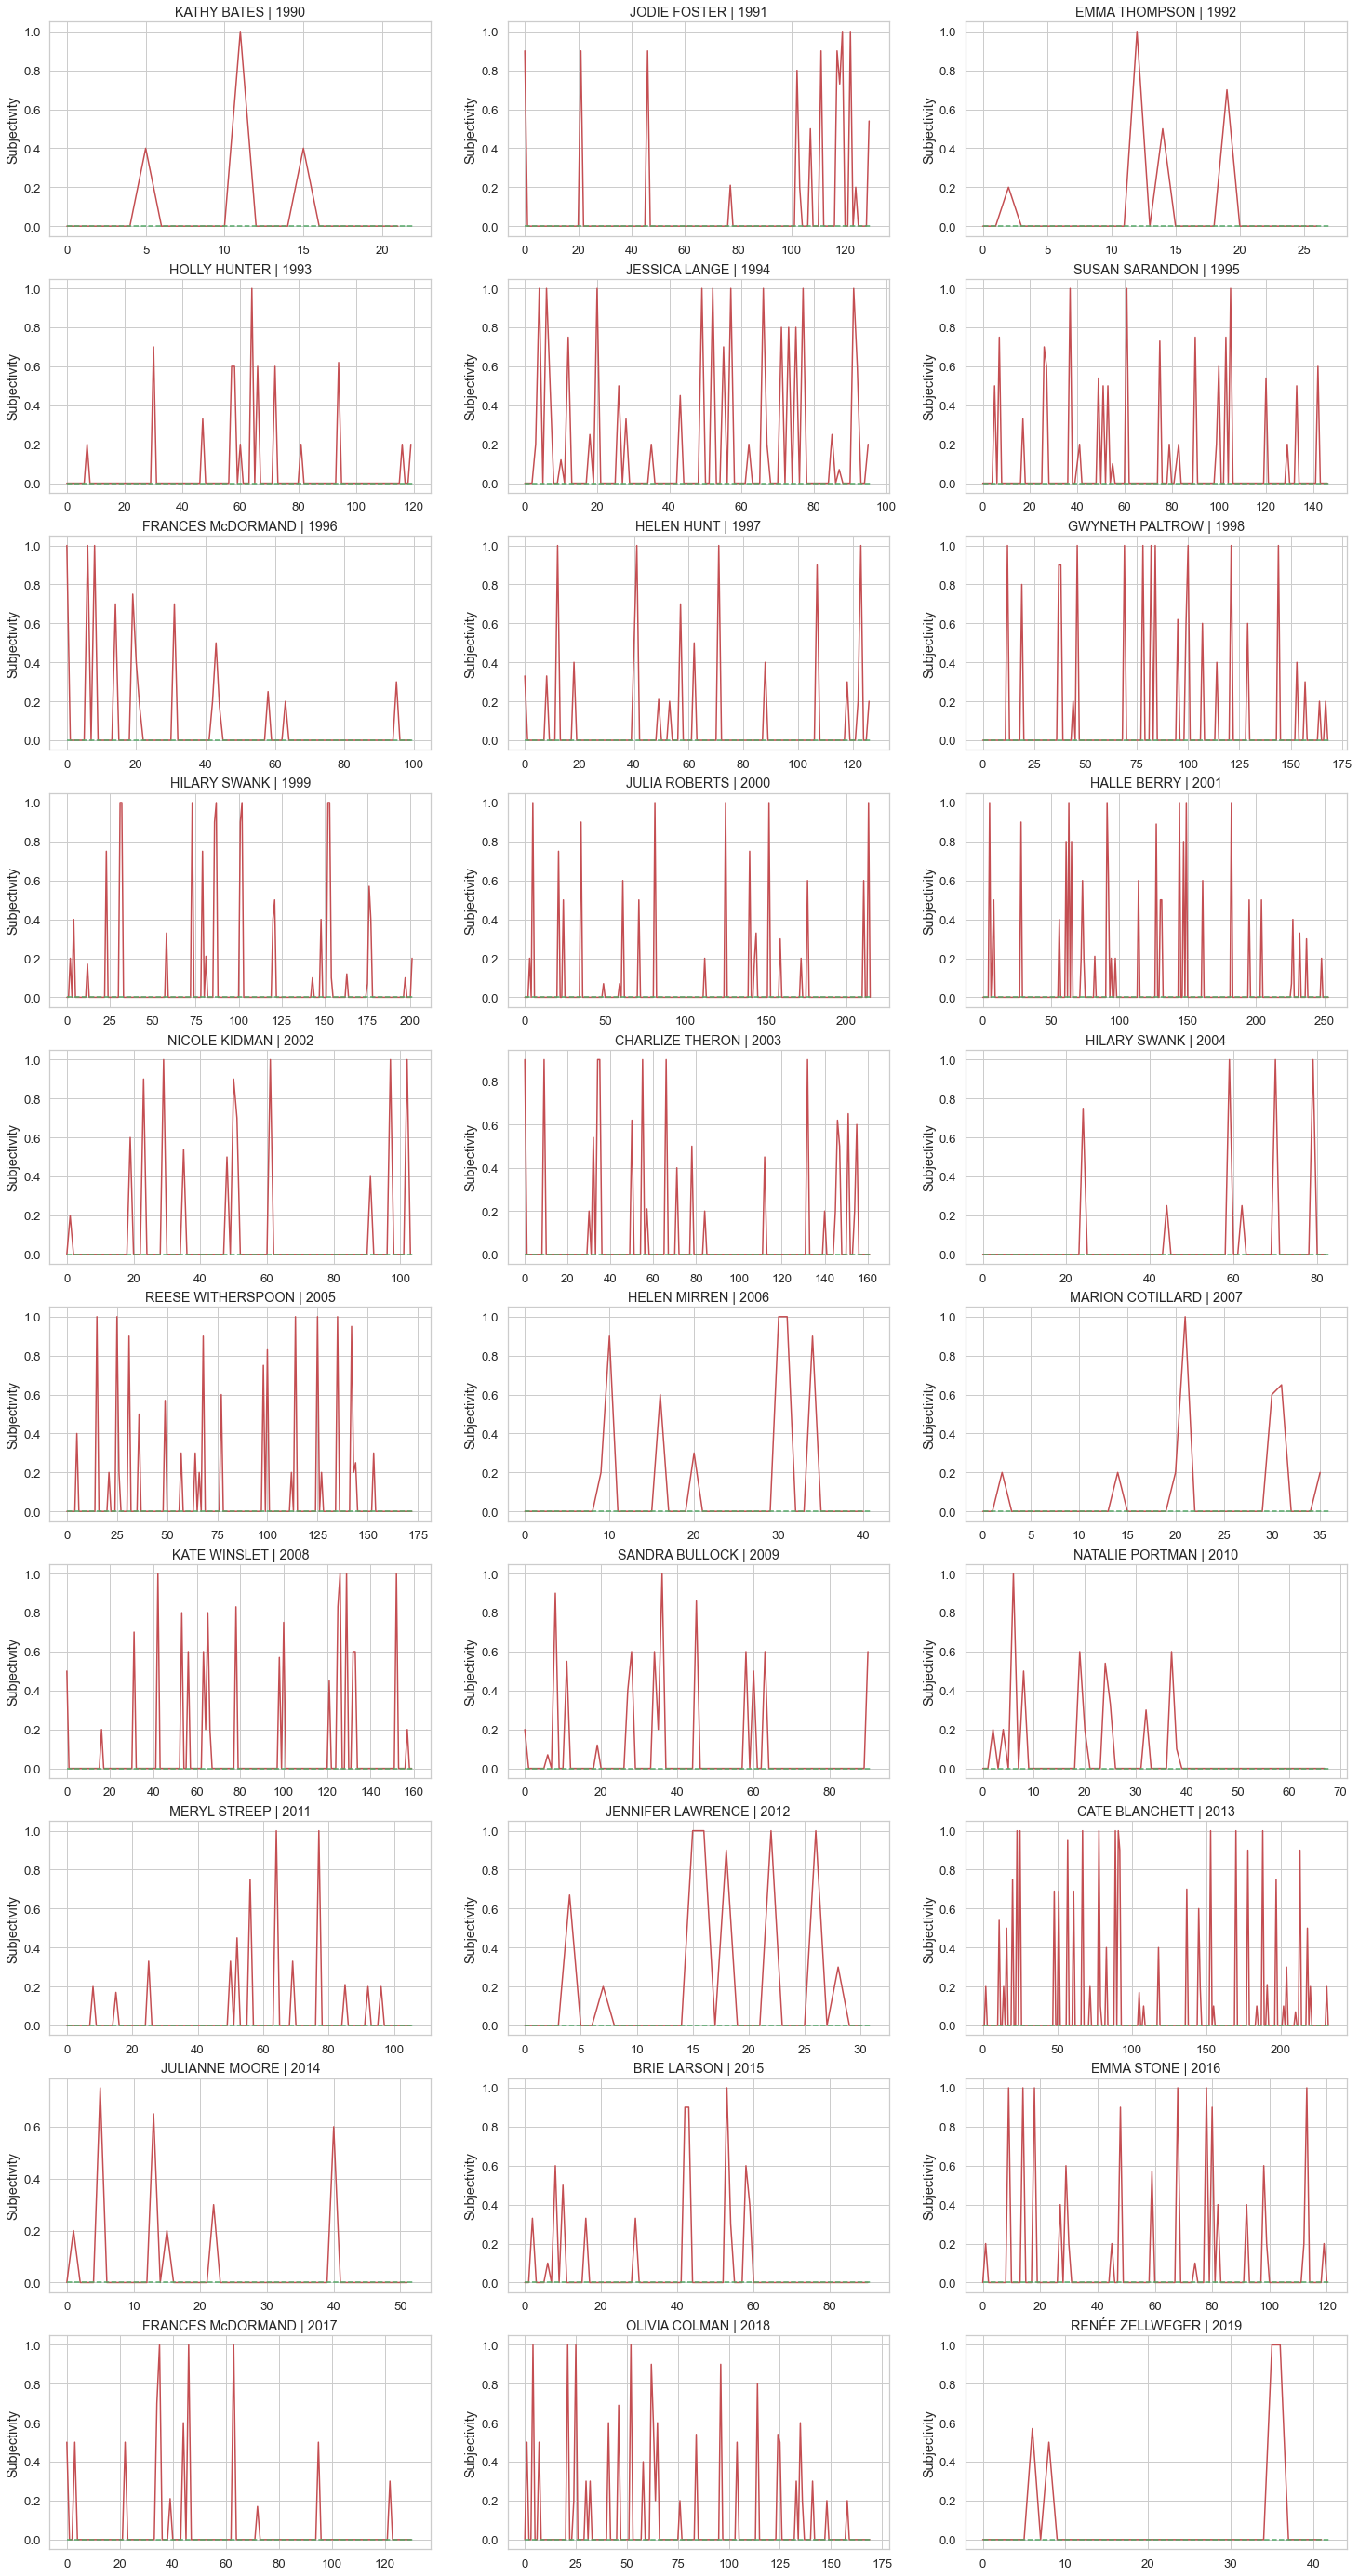

In [84]:
plt.figure(figsize = (25,50))
sns.set(style = 'whitegrid', font_scale = 1.2)

for ii in range(len(oscars['Winner'])):
    plt.subplot(10,3,ii+1)
    plt.plot(np.arange(len(subDict[oscars.index.values[ii]]) ),subDict[oscars.index.values[ii]], zorder = 1, color = 'r')
    plt.hlines(0,0,len(subDict[oscars.index.values[ii]]), color = 'g', zorder = 2, linewidth = 1.5, linestyle = 'dashed')
    
    plt.title(str(oscars['Winner'].iloc[ii]) + ' | ' + str(oscars.index.values[ii]))
    plt.ylabel('Subjectivity')

gs = gridspec.GridSpec(10, 3)
# set the space between subplots and the position of the subplots in the figure
gs.update(wspace=0.9, hspace=0.8, left = 0.1, right = 0.3, bottom = 0.1, top = 0.9) 
plt.show()

### Checking Polarity for Partially processed data.

In [89]:
#### Tokenizing each speech into a dictionary.

tokenDict = dict()
for ii in range(len(yearList)):
    tokenDict[yearList[ii]] = df.SpeechMod.iloc[ii].split()
    

#### Creating a dictionary for Polarity of each word.

polDict = dict()
for ii in yearList:
    polDict[ii] = [pol(tokenDict[ii][jj]) for jj in range(len(tokenDict[ii]))]

#### Creating a dictionary for Subjectivity of each word.

subDict = dict()
for ii in yearList:
    subDict[ii] = [sub(tokenDict[ii][jj]) for jj in range(len(tokenDict[ii]))]

#### Polarity.

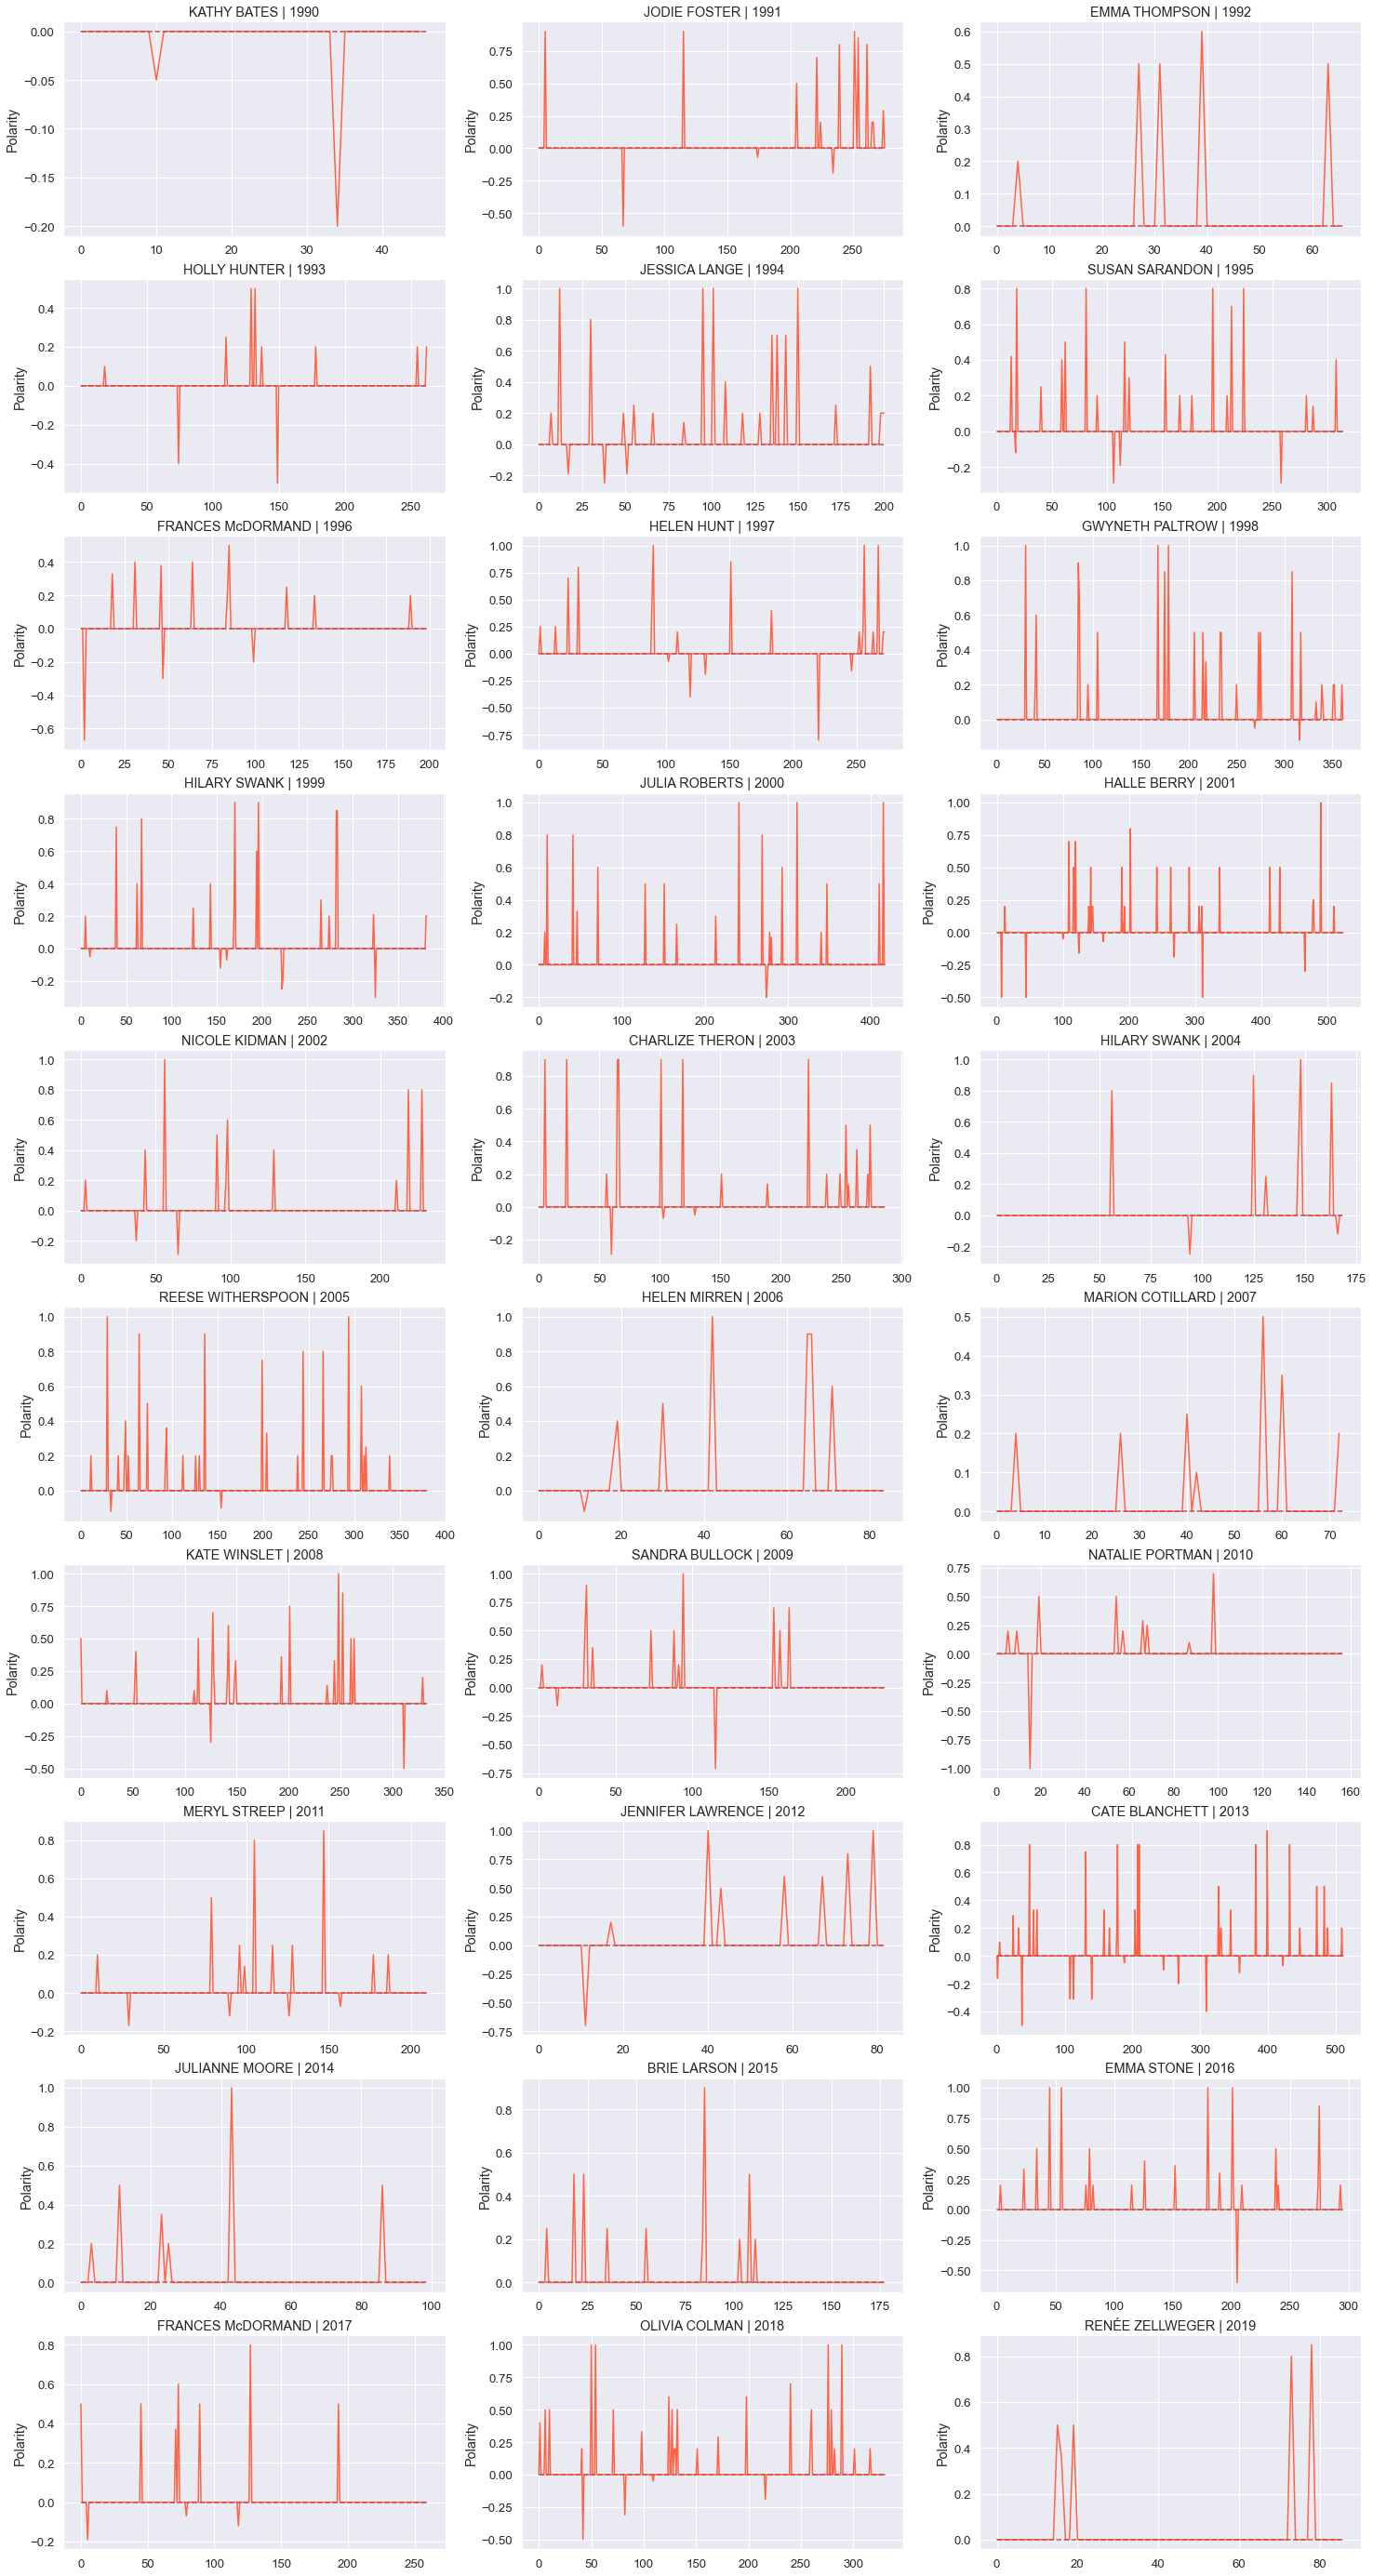

In [91]:
plt.figure(figsize = (25,50))
sns.set(style = 'darkgrid', font_scale = 1.2)

for ii in range(len(oscars['Winner'])):
    plt.subplot(10,3,ii+1)
    plt.plot(np.arange(len(polDict[oscars.index.values[ii]]) ),polDict[oscars.index.values[ii]], color = 'tomato',zorder = 1)
    
    plt.hlines(0,0,len(polDict[oscars.index.values[ii]]), 
               color = 'r', 
               linewidth = 1.5, 
               linestyle = 'dashed',
               zorder = 2)
    
    plt.ylabel('Polarity')
    plt.title(str(oscars['Winner'].iloc[ii]) + ' | ' + str(oscars.index.values[ii]))

gs = gridspec.GridSpec(10, 3)
# set the space between subplots and the position of the subplots in the figure
gs.update(wspace=0.9, hspace=0.8, left = 0.1, right = 0.3, bottom = 0.1, top = 0.9) 
plt.show()

### Checking Subjectivity for Partially processed data.

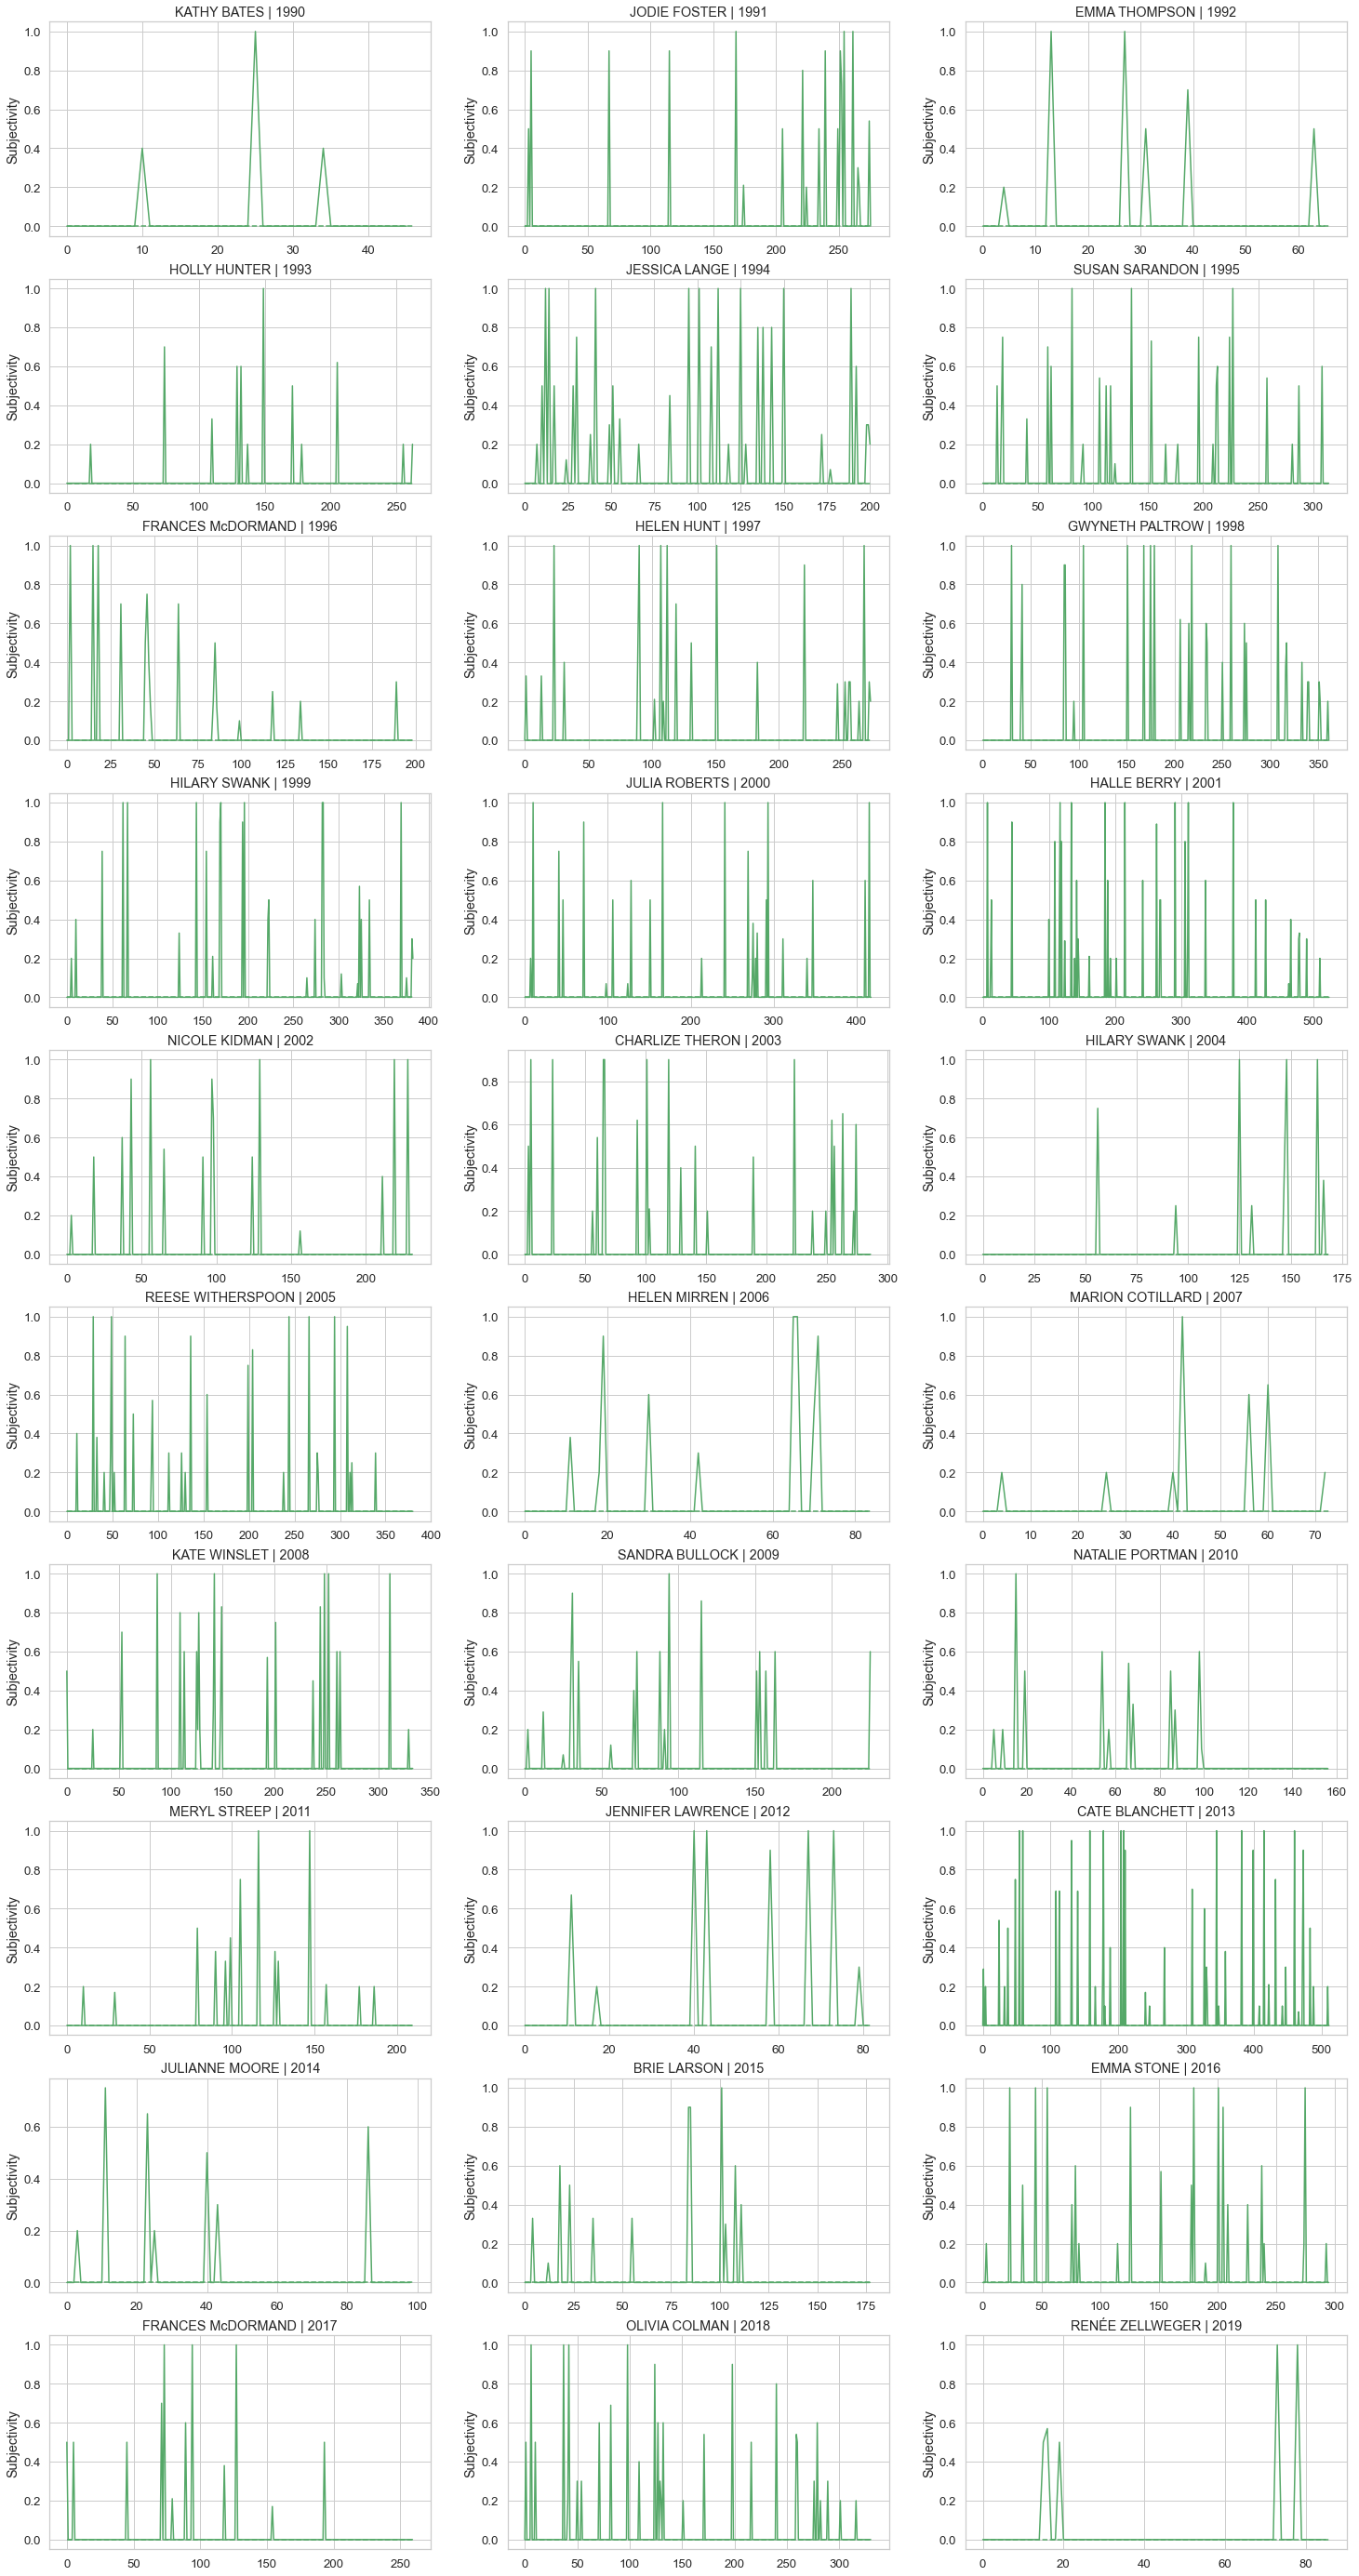

In [94]:
plt.figure(figsize = (25,50))
sns.set(style = 'whitegrid', font_scale = 1.2)

for ii in range(len(oscars['Winner'])):
    plt.subplot(10,3,ii+1)
    plt.plot(np.arange(len(subDict[oscars.index.values[ii]]) ),subDict[oscars.index.values[ii]], zorder = 1, color = 'g')
    plt.hlines(0,0,len(subDict[oscars.index.values[ii]]), color = 'g', zorder = 2, linewidth = 1.5, linestyle = 'dashed')
    
    plt.title(str(oscars['Winner'].iloc[ii]) + ' | ' + str(oscars.index.values[ii]))
    plt.ylabel('Subjectivity')

gs = gridspec.GridSpec(10, 3)
# set the space between subplots and the position of the subplots in the figure
gs.update(wspace=0.9, hspace=0.8, left = 0.1, right = 0.3, bottom = 0.1, top = 0.9) 
plt.show()

<hr>